<h1><font color="#f37626">[Experiment]</font> tensorflow-autolog 예제 코드</h1>

> reference: https://www.tensorflow.org/tutorials/keras/classification

### 1. Import modules

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

### 2. Fashion-MNIST 데이터셋 임포트
__Fashion-Mnist dataset__
- 70,000개의 흑백 이미지로 구성
- 10개의 카테고리로 분류해야 함
(T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot)
   

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images, valid_images, train_labels, valid_labels = train_test_split(train_images, train_labels, test_size = 10000, random_state=42)

In [3]:
print('Shape of train images: ', train_images.shape)
print('Shape of train labels: ', train_labels.shape)
print('-'*40)
print('Shape of valid images: ', valid_images.shape)
print('Shape of valid labels: ', valid_labels.shape)
print('-'*40)
print('Shape of test images: ', test_images.shape)
print('Shape of test labels: ', test_labels.shape)
print('-'*40)
print('Unique labels:',np.unique(train_labels))

Shape of train images:  (50000, 28, 28)
Shape of train labels:  (50000,)
----------------------------------------
Shape of valid images:  (10000, 28, 28)
Shape of valid labels:  (10000,)
----------------------------------------
Shape of test images:  (10000, 28, 28)
Shape of test labels:  (10000,)
----------------------------------------
Unique labels: [0 1 2 3 4 5 6 7 8 9]


- `train_images` & `train_labels`:  모델 __학습__에 사용되는 훈련 세트입니다.
- `test_images` & `test_labels`: 모델 __테스트__에 사용되는 테스트 세트입니다.

레이블이 정수 배열이므로 원 클래스를 맵핑해주기 위하여 `labels_names` 변수를 다음과 같이 생성해줍니다.

In [4]:
labels_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### 3. 데이터 전처리

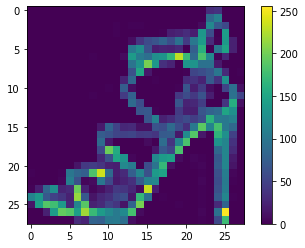

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

네트워크를 훈련하기 전에 데이터를 전처리해야 합니다. 훈련 세트에 있는 첫 번째 이미지를 보면 픽셀 값의 범위가 0~255 사이라는 것을 알 수 있습니다.  
신경망 모델에 주입하기 전에 이 값의 범위를 [0, 1]로 조정합니다. 이렇게 하려면 255로 나누어야 합니다. 훈련 세트와 테스트 세트를 동일한 방식으로 전처리하는 것이 중요합니다.

In [6]:
train_images = train_images / 255.0
valid_images = valid_images / 255.0
test_images = test_images / 255.0

훈련 데이터셋에서 처음 25개 image와 label을 출력해서 데이터 포맷을 확인합니다.

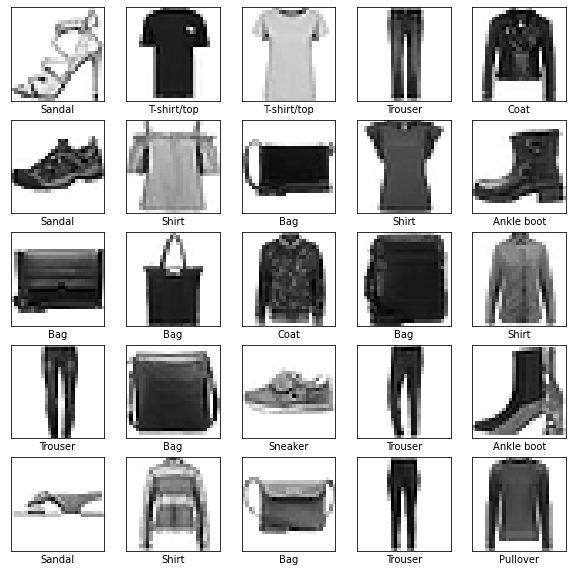

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(labels_names[train_labels[i]])
plt.show()

### 4. 모델 구성

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

### 5. 모델 컴파일
모델 컴파일 단계에서 다음의 설정이 필요합니다.
- 손실 함수(Loss function): 훈련 하는 동안 모델의 오차를 측정합니다. 모델의 학습이 올바른 방향으로 향하도록 이 함수를 최소화해야 합니다.
- 옵티마이저(Optimizer): 데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정합니다.
- 지표(Metrics): 훈련 단계와 테스트 단계를 모니터링하기 위해 사용합니다. 다음 예에서는 올바르게 분류된 이미지의 비율인 정확도를 사용합니다.

In [9]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### 6. autolog() 선언
- `autolog()`에 현재 학습할 모델에 관한 간단한 tag를 입력할 수 있습니다.
- `autolog()`는 반드시 모델 학습(model.fit()) __이전에__ 호출이 되어야 합니다.

> __모델 학습이 완료되면 `autolog()`는 자동으로 해제됩니다.__  
따라서 모델 학습 이력을 추가하고자 할 경우, 다시 한 번 `autolog()` 호출 후 모델 훈련을 진행해야 합니다.

In [10]:
from Accuinsight.Lifecycle.tensorflow import accuinsight

accu = accuinsight()
accu.autolog('tutorial-fashion-mnist', best_weights=True)

In [ ]:
model.fit(train_images, train_labels, epochs=30, validation_data = (valid_images, valid_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
49632/50000 [============================>.] - ETA: 0s - loss: 0.5187 - accuracy: 0.8165

Epoch 00001: val_accuracy improved from -inf to 0.85510, storing weights.

50000/50000 [==============================] - 5s 109us/sample - loss: 0.5177 - accuracy: 0.8169 - val_loss: 0.4008 - val_accuracy: 0.8551
Epoch 2/30
49408/50000 [============================>.] - ETA: 0s - loss: 0.3878 - accuracy: 0.8611

Epoch 00002: val_accuracy improved from 0.85510 to 0.86250, storing weights.

50000/50000 [==============================] - 5s 90us/sample - loss: 0.3879 - accuracy: 0.8610 - val_loss: 0.3750 - val_accuracy: 0.8625
Epoch 3/30
49568/50000 [============================>.] - ETA: 0s - loss: 0.3433 - accuracy: 0.8749

Epoch 00003: val_accuracy improved from 0.86250 to 0.86740, storing weights.

50000/50000 [==============================] - 4s 88us/sample - loss: 0.3437 - accuracy: 0.8748 - val_loss: 0.3674 - val_accuracy: 0.8674
E

### 7. 저장된 모델 불러오기
- `autolog()`를 사용하여 모델의 학습 이력을 Lifecycle에 기록할 경우, 자동으로 훈련 도중 가장 좋은 metric을 기록한 epoch에서의 모델 가중치가 저장됩니다.
- 따라서 저장된 모델을 불러와 공동 작업자들과 모델을 공유하거나, 모델 재학습을 수행할 수 있습니다.

    1. Accuinsight+ workspace list 혹은 해당 모델의 상세화면으로 접속하여 _Experiment_ 중 불러오고자 하는 모델의 __Run name__을 복사합니다.
    2. ___utils___에서 `load_model()` 함수를 호출하여 모델을 불러올 수 있습니다.

In [12]:
from Accuinsight.Lifecycle.utils import load_model

saved_model = load_model('tf.keras-3A34A863E9074C7DBC8BA2A2D04EF7D8_41')

In [13]:
saved_model.get_weights()

[array([[ 0.18878746,  0.53333575, -2.0609963 , ...,  0.03521208,
         -0.21518588,  1.8253199 ],
        [ 0.46025768, -1.4895583 , -0.40676317, ...,  0.06593468,
         -1.5042883 ,  1.1669194 ],
        [-1.2274816 , -1.8306774 , -0.9085877 , ..., -0.08088493,
         -1.7580316 ,  1.3718517 ],
        ...,
        [-2.6898844 ,  0.02130071, -0.3902625 , ...,  0.05507908,
          0.88226736, -2.0021806 ],
        [-5.422913  ,  2.562465  ,  0.9182473 , ..., -0.07368111,
         -0.43211028, -3.3147023 ],
        [-1.5036907 , -0.6673704 , -1.6551399 , ..., -0.01425047,
         -1.2973273 ,  0.06098923]], dtype=float32),
 array([ 0.01778263,  0.09936896,  0.01375297,  0.1578902 , -0.00914331,
        -0.00480478, -0.04935746,  0.13768412,  0.23322344, -0.00579406,
         0.39551732, -0.0051014 , -0.00848135,  0.17846021, -0.00981941,
         0.04483736,  0.01553402, -0.00600151, -0.00800996,  0.22279567,
        -0.00648313, -0.00600455, -0.00813856,  0.23096883, -0.005